In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [2]:
seed = 5
data_path = "income2.csv"

In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['workclass', 'eduction-levels', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)
# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])

data.describe()

,age,fnlwgt,eduction-years,capital-gain,capital-loss,hours-per-week,workclass,eduction-levels,marital-status,occupation,relationship,race,sex,native-country,income
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437187,1.897920e+05,10.121349,1092.044064,88.375419,40.931269,2.19933,10.333742,2.580153,5.959981,1.418388,3.678592,0.675674,36.382514,0.248898
std,13.134296,1.056542e+05,2.550029,7406.466611,404.304753,11.980182,0.95394,3.812353,1.498037,4.029569,1.601344,0.834721,0.468130,6.105467,0.432382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176270e+05,9.000000,0.000000,0.000000,40.000000,2.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,0.000000,0.000000,40.000000,2.00000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,0.000000,0.000000,45.000000,2.00000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,6.00000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f565e3d0278>,
      dtype=object)

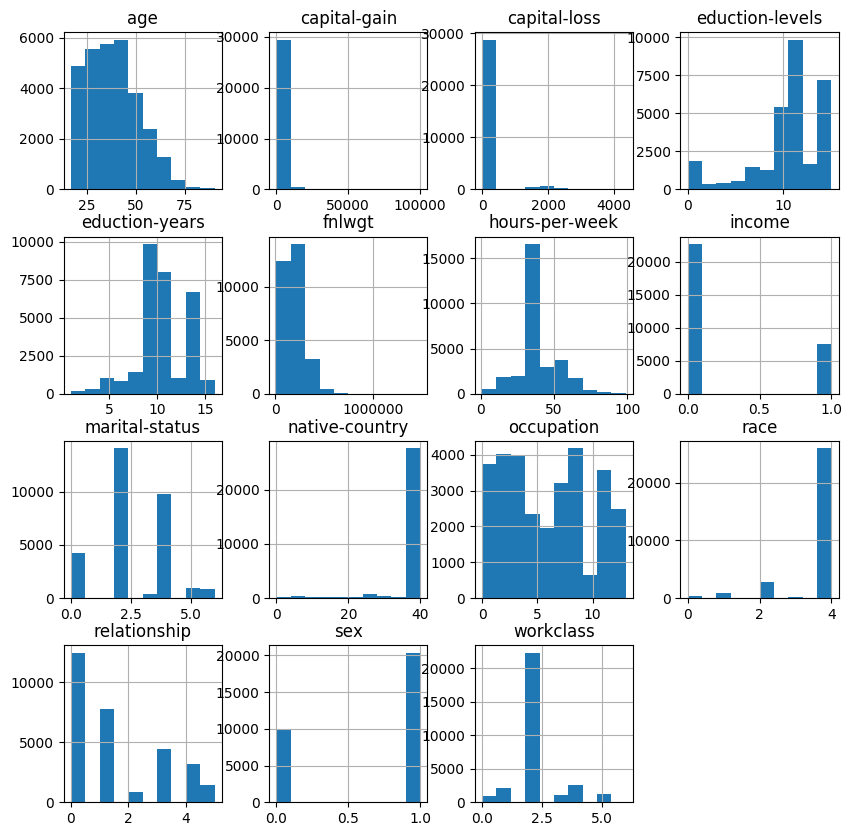

In [4]:
# draw hist for dataset
data.hist(figsize=(10, 10))

In [5]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [6]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(24128, 14)
(6033, 14)
(24128,)
(6033,)


In [7]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)

data1_scorer = make_scorer(balanced_accuracy)

# Section 4: KNN

In [9]:
n_neighbors = np.arange(1, 51, 3)
params = {'metric': ['manhattan', 'euclidean', 'chebyshev'], 'n_neighbors': np.arange(1, 51, 3),
          'weights': ['uniform']}



Use grid search to find best params. Take a few minutes.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator


KNN_classifier = KNeighborsClassifier()

grid_seacher = sklearn.model_selection.GridSearchCV(KNN_classifier, n_jobs=40, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=data1_scorer)
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 51 candidates, totalling 255 fits


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.7175934605635849, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.724256988749258, total=  12.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.7150822590370093, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.7251017255735163, total=   9.7s[CV] metric=manhattan, n_neighbors=19, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.7160604094289241, total=   9.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............


[Parallel(n_jobs=40)]: Done   5 tasks      | elapsed:   54.9s
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.7471646834040067, total=  16.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.7054174394900801, total=  12.4s[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.7096114716764728, total=  16.3s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.7007259632793129, total=  15.6s[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.6983501105400671, total=  13.7s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.7442383830251833, total=  16.9s[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.7363337448677827, total=  22.5s[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.7269710873122973, total=  13.1s[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............





/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.7470948921875448, total=  24.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.6994712452266789, total=  13.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.7481033621407448, total=  19.1s[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.7269331878606907, total=  15.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.7490486663412673, total=  18.5s
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.738189914401722, total=  20.6s[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.7360065333708297, total=  24.3s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............




[Parallel(n_jobs=40)]: Done  18 tasks      | elapsed:  2.7min


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.7384001837549169, total=  26.1s[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.753801674653021, total=  27.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.7425406414195067, total=  23.3s[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.7333706458745748, total=  26.3s[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.7323503976571248, total=  21.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.7336296764190761, total=  26.4s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.734702805133653, total=  31.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.7497113102951367, total=  24.5s[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=40, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=19, weights=uniform, score=0.7417054753222889, total=  28.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=40, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=40, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7379611243503977, total=  22.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=40, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.7561278496764102, total=  25.0s[CV] metric=manhattan, n_neighbors=40, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=19, weights=uniform, score=0.7578196655472904, total=  29.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.7334690057136295, total=  22.8s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=40)]: Done  33 tasks      | elapsed:  3.9min


[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=19, weights=uniform, score=0.7584805616364584, total=  35.6s[CV]  metric=manhattan, n_neighbors=19, weights=uniform, score=0.7452916822188406, total=  26.4s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=19, weights=uniform, score=0.7463951304947026, total=  41.5s[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=46, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7505921987379905, total=  39.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.7366515260271613, total=  40.9s[CV] metric=manhattan, n_neighbors=46, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=46, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.7290552126101812, total=  38.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=46, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7472302965919206, total= 1.1min


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=manhattan, n_neighbors=46, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.7334664790835222, total=  32.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.7491521965690843, total=  37.7s[CV]  metric=manhattan, n_neighbors=28, weights=uniform, score=0.7462403708829839, total=  28.3s[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7562561689761844, total=  47.3s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=28, weights=uniform, score=0.7328046168422867, total=  34.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7404236699302305, total=  51.7s
[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=28, weights=uniform, score=0.7379080651181488, total=  30.7s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.7444684846880728, total= 1.1min

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=28, weights=uniform, score=0.7354025668264951, total=  36.5s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................

[Parallel(n_jobs=40)]: Done  48 tasks      | elapsed:  6.0min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7440401963880674, total=  34.7s[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.74031858508714, total=  58.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................


[CV]  metric=manhattan, n_neighbors=28, weights=uniform, score=0.7457150314399517, total=  50.9s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=1, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=1, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7391721840994574, total=  51.3s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.7143926038645955, total=  11.5s
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.7210815125326596, total=  22.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7335043785351288, total= 1.3min[CV] metric=euclidean, n_neighbors=4, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.7081629676419077, total=  16.0s

[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.731898362843326, total=   8.0s

[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.7148196039724072, total=   7.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7410023701734941, total=  50.6s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7555590861552093, total=  56.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7573575092867791, total= 1.1min[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7347002785035458, total=  40.7s[CV] metric=euclidean, n_neighbors=7, weights=uniform ................


[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7323882971087313, total=  40.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7463749174538458, total=  52.7s


[Parallel(n_jobs=40)]: Done  65 tasks      | elapsed:  7.3min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7388811622498492, total=  49.3s[CV] metric=euclidean, n_neighbors=7, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7367869304315369, total= 1.5min
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.6979363174366188, total=   8.1s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7479152996123541, total= 1.5min
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=46, weights=uniform, score=0.7378903787073989, total=  45.8s

[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.6925494272014701, total=  12.8s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=46, weights=uniform, score=0.7380586293031669, total= 1.1min
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.6989034156598714, total=  11.7s
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.7026537655402109, total=  18.5s
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.7104441111435835, total=  11.9s[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............

[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7367172184099459, total=  46.5s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=46, weights=uniform, score=0.7479080622659926, total=  46.8s

[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7486509816139237, total= 1.2min[CV]  metric=manhattan, n_neighbors=46, weights=uniform, score=0.7440497525057301, total=  42.1s
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.7451840707456431, total=  16.3s[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.7402362399150134, total=  13.5s
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.7372866289586263, total=  17.2s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=16, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.745071022492294, total=  19.9s[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7464265889536499, total=  49.4s


[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:  8.5min



[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7415542465531851, total=  47.7s[CV] metric=euclidean, n_neighbors=16, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.7449499405388814, total=  19.5s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7441756007924432, total=  52.7s
[CV] metric=euclidean, n_neighbors=16, weights=uniform ...............


[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7448526228143213, total= 1.3min
[CV] metric=euclidean, n_neighbors=16, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.7257347612621667, total=  21.5s
[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7425052685980075, total=  31.8s
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.7319692428862629, total=  17.0s[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.721260329036148, total=  16.1s

[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.727660742484711, total=  30.4s
[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7463976571248099, total= 1.4min

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=16, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7432328232220277, total=  14.3s
[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7480846305415098, total=  41.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7361553877515862, total=  19.0s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7513037562516888, total=  23.6s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7512748068662429, total=  24.8s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.732506644573231, total=  20.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=16, weights=uniform, score=0.721955037468776, total=  13.8s
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7415953372189842, total=  21.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............


[Parallel(n_jobs=40)]: Done 101 tasks      | elapsed:  9.3min


[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7543028896081816, total= 2.5min


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=46, weights=uniform, score=0.7323933503689454, total=  46.7s[CV]  metric=euclidean, n_neighbors=16, weights=uniform, score=0.7373813994224828, total=  14.6s[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............


[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7494377845540785, total= 2.4min[CV]  metric=euclidean, n_neighbors=16, weights=uniform, score=0.7287818771713228, total=  13.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7404034568893737, total=  55.9s[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7494498467980143, total=  33.7s[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7426204599615261, total=  23.8s[CV]  metric=euclidean, n_neighbors=16, weights=uniform, score=0.7283478710270178, total=  24.7s


[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7368450429240002, total=  35.3s
[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7387887105572942, total= 1.1min



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7457295061326746, total= 1.0min[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, score=0.7414259272534109, total=   8.3s[CV]  metric=euclidean, n_neighbors=19, weights=uniform, score=0.7321174882999797, total=   9.7s


[CV]  metric=euclidean, n_neighbors=19, weights=uniform, score=0.7404640960119441, total=  13.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............

[CV]  metric=euclidean, n_neighbors=16, weights=uniform, score=0.728069921496619, total=  23.0s[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.731828993080479, total=  11.1s[CV]  metric=euclidean, n_neighbors=19, weights=uniform, score=0.7465558012001493, total=  14.6s
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, score=0.7507349927304876, total=  13.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed: 10.1min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............

[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7262561658388125, total=   8.4s[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7333437078296823, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=28, weights=uniform ...............




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=28, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=28, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=28, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=28, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7369747294840762, total=   8.7s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7309962218754423, total=   8.4s[CV] metric=euclidean, n_neighbors=31, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=31, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=25, weights=uniform, score=0.7441882339429786, total=   6.9s[CV]  metric=euclidean, n_neighbors=25, weights=uniform, score=0.7479514863441614, total=   9.5s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=31, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=25, weights=uniform, score=0.7366868988486606, total=  11.6s
[CV]  metric=euclidean, n_neighbors=25, weights=uniform, score=0.7426836257142037, total=  16.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=31, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=28, weights=uniform, score=0.7291855637543427, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=28, weights=uniform, score=0.7297600275632375, total=  11.4s
[CV] metric=euclidean, n_neighbors=31, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=25, weights=uniform, score=0.7429580619902841, total=  12.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=28, weights=uniform, score=0.7383471830869419, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=28, weights=uniform, score=0.738504451772162, total=  12.0s[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=28, weights=uniform, score=0.7286136265755547, total=  15.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=31, weights=uniform, score=0.735453099428637, total=  12.4s
[CV]  metric=euclidean, n_neighbors=31, weights=uniform, score=0.733940911309541, total=  16.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=31, weights=uniform, score=0.7348811622498492, total=  12.2s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=31, weights=uniform, score=0.7469857026797022, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=43, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=31, weights=uniform, score=0.7461385885198685, total=   9.9s[CV] metric=euclidean, n_neighbors=43, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.7287919836917511, total=  10.2s[CV] metric=euclidean, n_neighbors=46, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.7268356829079216, total=  15.0s


[Parallel(n_jobs=40)]: Done 141 tasks      | elapsed: 12.2min



[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.7252830687071119, total=  12.7s[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.7381995641968706, total=  11.2s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':





[CV] metric=euclidean, n_neighbors=46, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.7375498578770565, total=  12.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=46, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.7372512561371273, total=  13.6s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=46, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.7421109478304505, total=  14.5s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.7308457894283499, total=  11.8s[CV] metric=euclidean, n_neighbors=46, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=49, weights=uniform ...............

[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.7312671624221195, total=  12.9s[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.74614582586623, total=  16.8s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.7271241781274226, total=  15.9s
[CV] metric=euclidean, n_neighbors=49, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.7440497525057301, total=  15.6s

[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.7213932068104165, total=  15.5s
[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.7370958114374887, total=  16.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  metric=euclidean, n_neighbors=43, weights=uniform, score=0.7284908553217145, total=  16.4s[CV] metric=euclidean, n_neighbors=49, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=43, weights=uniform, score=0.7326970053690891, total=  15.7s[CV] metric=euclidean, n_neighbors=49, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=43, weights=uniform, score=0.743650319913685, total=  13.5s


[CV]  metric=euclidean, n_neighbors=43, weights=uniform, score=0.7364186166700164, total=  21.4s
[CV]  metric=euclidean, n_neighbors=43, weights=uniform, score=0.7427959684074897, total=  18.5s
[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.7419681538379533, total=  22.6s
[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.7271216514973156, total=  14.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=euclidean, n_neighbors=49, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=4, weights=uniform ................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.7297398145223809, total=  25.6s


[Parallel(n_jobs=40)]: Done 162 tasks      | elapsed: 13.4min


[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.7409975452759199, total=  15.4s
[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7160907289902093, total=   5.0s[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.7257019150707743, total=  19.2s

[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.713570644771741, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7127374314508025, total=   5.0s[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7109342214820983, total=   5.4s

[CV] metric=chebyshev, n_neighbors=4, weights=uniform ................[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7349433327267749, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=4, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=7, weights=uniform ................

[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.7325162943683796, total=  14.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=7, weights=uniform ................
[CV] metric=chebyshev, n_neighbors=7, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=7, weights=uniform ................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=7, weights=uniform ................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=10, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=4, weights=uniform, score=0.6900262424990667, total=   8.2s[CV]  metric=chebyshev, n_neighbors=4, weights=uniform, score=0.690174280053978, total=   8.4s

[CV] metric=chebyshev, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.7317213816072813, total=  16.7s
[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.732120014930087, total=  12.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=10, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=4, weights=uniform, score=0.6889303741135261, total=  11.4s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=10, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.7442118460885245, total=  11.1s[CV]  metric=chebyshev, n_neighbors=4, weights=uniform, score=0.6894756806781692, total=   3.9s[CV] metric=chebyshev, n_neighbors=13, weights=uniform ...............




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=4, weights=uniform, score=0.7137722565632393, total=  11.0s[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.7300156765913461, total=  14.7s

[CV] metric=chebyshev, n_neighbors=13, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=7, weights=uniform, score=0.7296726291308967, total=   4.6s
[CV]  metric=chebyshev, n_neighbors=7, weights=uniform, score=0.731746378569735, total=   6.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=7, weights=uniform, score=0.7289703408079473, total=   6.0s
[CV] metric=chebyshev, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=13, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=13, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=16, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=16, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] metric=chebyshev, n_neighbors=16, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=16, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=16, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=7, weights=uniform, score=0.7298029802750582, total=   6.4s[CV]  metric=chebyshev, n_neighbors=7, weights=uniform, score=0.7392521960176673, total=   7.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':





[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.7376645749586899, total=  20.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=10, weights=uniform, score=0.7146194263401189, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=22, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=22, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=22, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=22, weights=uniform ...............


[CV]  metric=chebyshev, n_neighbors=10, weights=uniform, score=0.7087833701800226, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=10, weights=uniform, score=0.7123872634873237, total=  12.6s[CV] metric=chebyshev, n_neighbors=22, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] metric=chebyshev, n_neighbors=25, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=10, weights=uniform, score=0.7150188033151182, total=  10.6s[CV]  metric=chebyshev, n_neighbors=13, weights=uniform, score=0.7307634442562233, total=   9.4s

[CV]  metric=chebyshev, n_neighbors=13, weights=uniform, score=0.732000604720496, total=   6.2s

[CV]  metric=chebyshev, n_neighbors=10, weights=uniform, score=0.7311293660727908, total=  16.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=13, weights=uniform, score=0.7304724224066151, total=  11.6s
[CV] metric=chebyshev, n_neighbors=25, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=16, weights=uniform, score=0.7140474891613311, total=   6.5s
[CV]  metric=chebyshev, n_neighbors=16, weights=uniform, score=0.7255840653392225, total=   9.5s[CV]  metric=chebyshev, n_neighbors=16, weights=uniform, score=0.718630124270981, total=  11.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=25, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=13, weights=uniform, score=0.7424206603033161, total=   8.7s[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, score=0.7257461589220169, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=25, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, score=0.734755864365902, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=25, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=13, weights=uniform, score=0.7282427861839271, total=  15.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=28, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=28, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, score=0.7284009302592667, total=  14.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.7251629207080929, total=   6.8s[CV] metric=chebyshev, n_neighbors=28, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.7134957650234, total=  12.1s



[Parallel(n_jobs=40)]: Done 202 out of 255 | elapsed: 14.8min remaining:  3.9min


[CV]  metric=chebyshev, n_neighbors=16, weights=uniform, score=0.7157355077665165, total=  15.7s
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, score=0.7365728844432436, total=  10.2s
[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.7173831002899882, total=   7.8s
[CV]  metric=chebyshev, n_neighbors=16, weights=uniform, score=0.7164024232679663, total=  28.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=28, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=28, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.7182485859484913, total=  18.0s
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, score=0.7268407361681357, total=   9.7s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.717809547047806, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.7261814005570071, total=  13.0s


[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=37, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=37, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=37, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=37, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=37, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=40, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=40, weights=uniform ...............


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=40, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=40, weights=uniform ...............[CV] metric=chebyshev, n_neighbors=40, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.721431106262023, total=   7.6s
[CV] metric=chebyshev, n_neighbors=43, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=43, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.7237928795540141, total=   7.4s[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.7298878520772918, total=   6.3s[CV] metric=chebyshev, n_neighbors=43, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] metric=chebyshev, n_neighbors=43, weights=uniform ...............




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.7348979557138735, total=   8.9s
[CV] metric=chebyshev, n_neighbors=43, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.7201518275000717, total=   6.3s
[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.7103006115593329, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=31, weights=uniform, score=0.7175462976255419, total=   7.2s[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':





[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=34, weights=uniform, score=0.7142106864968848, total=   8.0s



[CV]  metric=chebyshev, n_neighbors=31, weights=uniform, score=0.7294809742800794, total=   7.5s[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.717383577519102, total=   6.7s[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.7168642223434495, total=   6.8s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  metric=chebyshev, n_neighbors=31, weights=uniform, score=0.7232621091619054, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.7241971370436338, total=  16.0s[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=31, weights=uniform, score=0.7259954635504894, total=   9.3s[CV]  metric=chebyshev, n_neighbors=31, weights=uniform, score=0.7200484144008029, total=  10.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=37, weights=uniform, score=0.7247466009745375, total=   7.9s[CV]  metric=chebyshev, n_neighbors=34, weights=uniform, score=0.715708648789732, total=  12.5s

[CV]  metric=chebyshev, n_neighbors=37, weights=uniform, score=0.7195127049297999, total=  10.0s


[Parallel(n_jobs=40)]: Done 228 out of 255 | elapsed: 16.1min remaining:  1.9min


[CV]  metric=chebyshev, n_neighbors=34, weights=uniform, score=0.7066967182520314, total=  10.1s[CV]  metric=chebyshev, n_neighbors=40, weights=uniform, score=0.72155159975223, total=  20.5s
[CV]  metric=chebyshev, n_neighbors=34, weights=uniform, score=0.7228005589528962, total=  12.4s

[CV]  metric=chebyshev, n_neighbors=43, weights=uniform, score=0.7105966866691551, total=  12.4s
[CV]  metric=chebyshev, n_neighbors=37, weights=uniform, score=0.7185042349765999, total=  10.9s
[CV]  metric=chebyshev, n_neighbors=40, weights=uniform, score=0.7072418725749147, total=  18.3s[CV]  metric=chebyshev, n_neighbors=43, weights=uniform, score=0.7278205202434322, total=  12.0s

[CV]  metric=chebyshev, n_neighbors=37, weights=uniform, score=0.7143460909012606, total=  23.1s[CV]  metric=chebyshev, n_neighbors=46, weights=uniform, score=0.7243302812409822, total=  14.1s

[CV]  metric=chebyshev, n_neighbors=46, weights=uniform, score=0.701414912859973, total=  17.8s
[CV]  metric=chebyshev, n_neighbo

[Parallel(n_jobs=40)]: Done 255 out of 255 | elapsed: 16.8min finished


In [13]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 1.000 (+/-0.000); test: 0.720 (+/-0.008) for {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
train: 0.775 (+/-0.003); test: 0.703 (+/-0.008) for {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
train: 0.796 (+/-0.001); test: 0.744 (+/-0.008) for {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
train: 0.764 (+/-0.003); test: 0.732 (+/-0.009) for {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
train: 0.776 (+/-0.003); test: 0.749 (+/-0.012) for {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
train: 0.758 (+/-0.004); test: 0.738 (+/-0.012) for {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
train: 0.766 (+/-0.004); test: 0.750 (+/-0.014) for {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
train: 0.754 (+/-0.003); test: 0.738 (+/-0.015) for {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'uniform'}
train: 0.761 (+/-0.004); test: 0.746 (

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [18]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred)))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(training_y, training_y_pred)))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 0.7687
Final accuracy score on the training data: 0.8499
Final precision score on training data: 0.7428
Final recall score on training data: 0.6070
Final ROC AUC score on training data: 0.7687


The best parameters are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')


# Results on testing set

In [19]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred)))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred)))
print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(testing_y, testing_y_pred)))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.7631
Final accuracy score on the testing data: 0.8384
Final precision score on testing data: 0.7004
Final recall score on testing data: 0.6132
Final ROC AUC score on testing data: 0.7631


# Confusion Matrix for testing set

Text(0.5,107.986,'Predicted label')

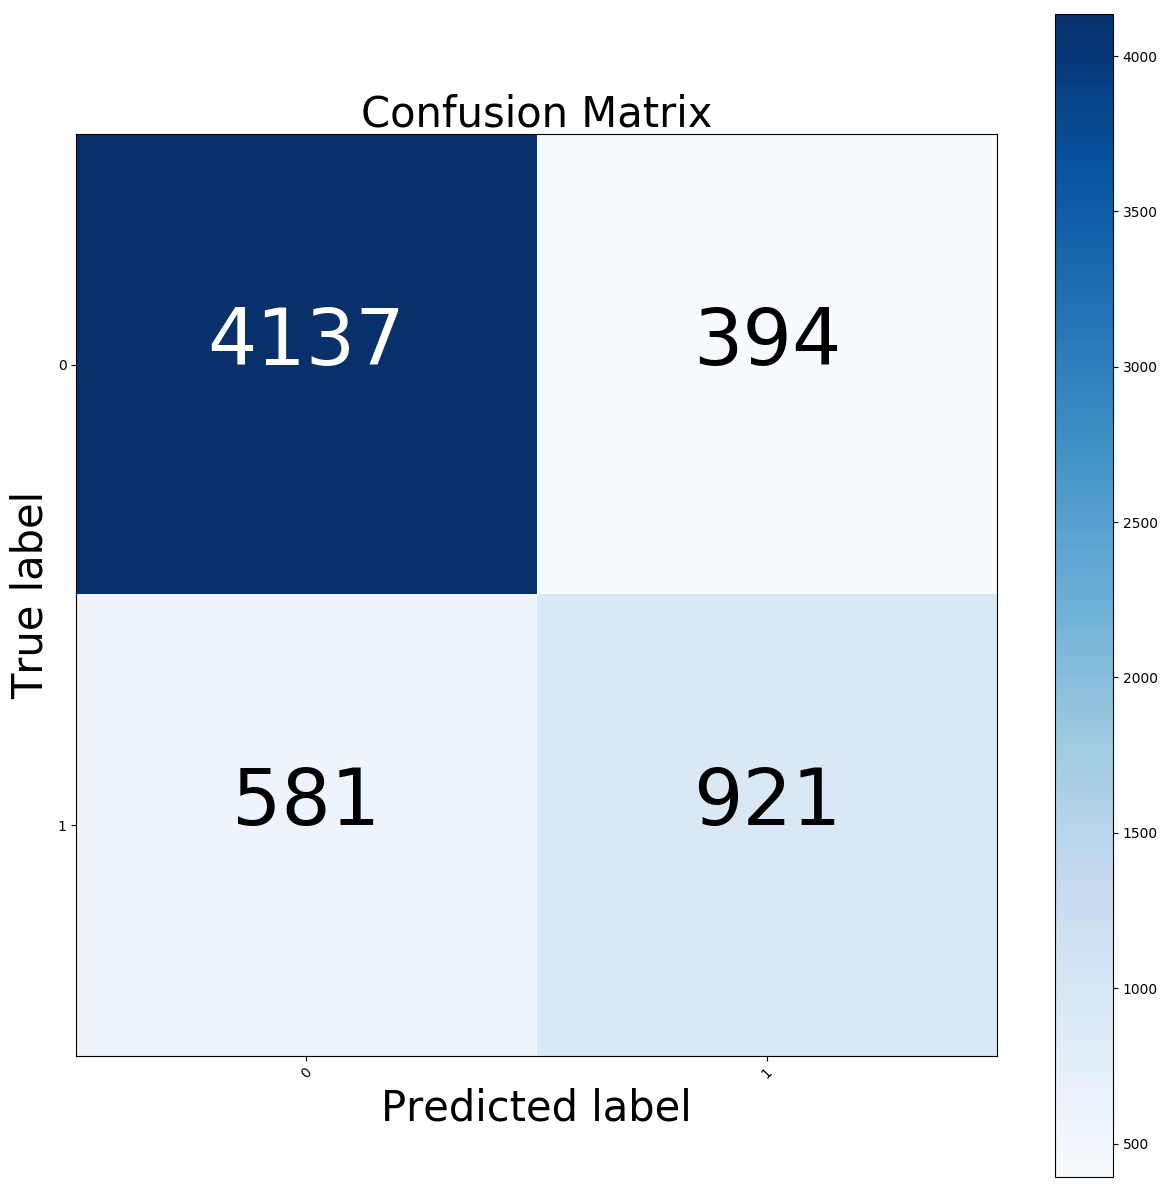

In [20]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)



Text(0.5,107.986,'Predicted label')

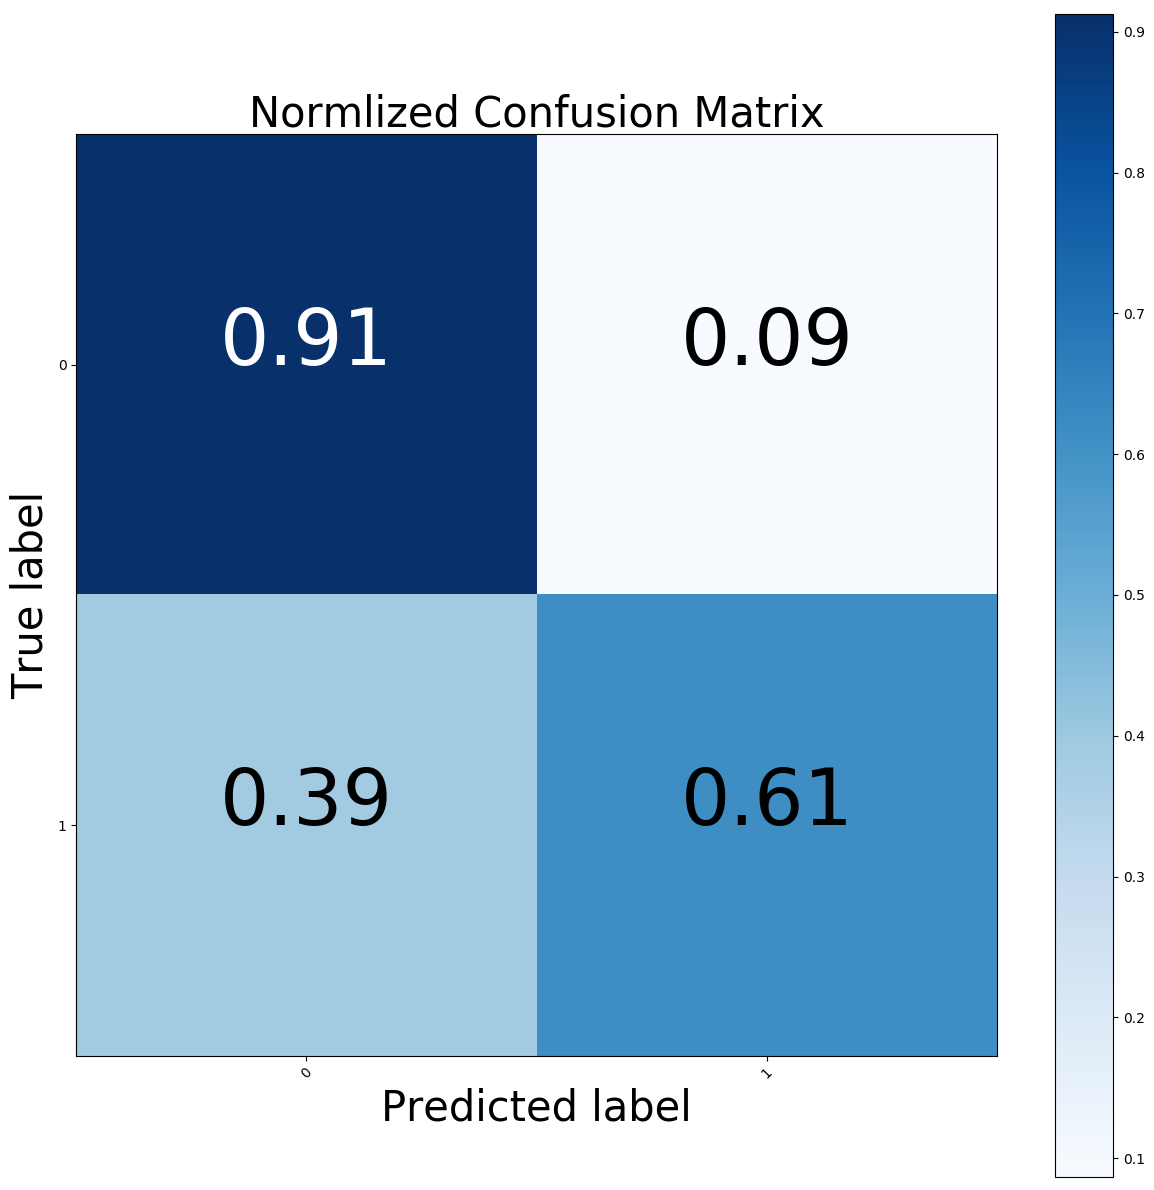

In [21]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [35]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  965  1013  1061  1109  1158  1206  1254  1302  1351  1399  1447  1495
  1544  1592  1640  1688  1737  1785  1833  1881  1930  2844  3758  4673
  5587  6501  7416  8330  9244 10158 11073 11987 12901 13816 14730 15644
 16559 17473 18387 19302]


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8166183174471612, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8195192706174886, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8195192706174886, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8176543721508496, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8155822627434729, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8143389970990468, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8143389970990468, total=   0.3s[CV] ....................... , score=0.8143389970990468, total=   0.3s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8137173642768338, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.810401989225031, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.809158723580605, total=   0.3s
[CV] ....................... , score=0.8116452548694572, total=   0.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    1.5s remaining:   22.8s


[CV] ....................... , score=0.8151678408619976, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8108164111065064, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8139245752175714, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8137173642768338, total=   0.5s
[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8151678408619976, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8153750518027352, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8143389970990468, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8151678408619976, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8139245752175714, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.825528387898881, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8261500207210941, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8232490675507667, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8269788644840448, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8290509738914215, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824285122254455, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8267716535433071, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8259428097803564, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824906755076668, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8284293410692084, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8284293410692084, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8286365520099461, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:   28.0s remaining:  2.4min


[CV] ....................... , score=0.8273932863655201, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8271860754247824, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8269788644840448, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8284293410692084, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8184832159138002, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8180687940323249, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8170327393286365, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8182760049730626, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8182760049730626, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8178615830915872, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.821798590965603, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.819933692498964, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8220058019063406, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ......................... , score=0.82117695814339, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8222130128470784, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8220058019063406, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8209697472026523, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8191048487360133, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319519270617488, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:  1.1min remaining:  2.9min


[CV] ....................... , score=0.8195192706174886, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8209697472026523, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8215913800248653, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8259428097803564, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824906755076668, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8278077082469955, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8315375051802735, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319519270617488, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319519270617488, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8323663489432243, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8302942395358475, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8298798176543721, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8294653957728968, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319519270617488, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8315375051802735, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8334024036469125, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8352673021135516, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8367177786987153, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8358889349357647, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:  1.7min remaining:  2.9min


[CV] ....................... , score=0.8385826771653543, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.840033153750518, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8234562784915044, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8228346456692913, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8244923331951927, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8244923331951927, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ......................... , score=0.82117695814339, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8205553253211769, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8207625362619146, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8213841690841276, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8222130128470784, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.823663489432242, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8234562784915044, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8383754662246167, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8228346456692913, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.823041856610029, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824285122254455, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8273932863655201, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8234562784915044, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8234562784915044, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8240779113137173, total=   0.4s

[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:  2.2min remaining:  2.4min


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8253211769581434, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8265644426025694, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8273932863655201, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8300870285951099, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321591380024865, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8327807708246996, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8371322005801907, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321591380024865, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8298798176543721, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8325735598839619, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8334024036469125, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8373394115209283, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8360961458765023, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8373394115209283, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.837546622461666, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8402403646912557, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8365105677579776, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8350600911728139, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8352673021135516, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8373394115209283, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:  2.8min remaining:  2.0min


[CV] ....................... , score=0.8132642487046632, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8151295336787565, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8128497409326425, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8163730569948187, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8178238341968912, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8169948186528497, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8188601036269431, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8188601036269431, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8153367875647668, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8356817239950269, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8163730569948187, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8163730569948187, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8169948186528497, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8198963730569948, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8182383419689119, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8174093264248705, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8186528497409327, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8192746113989637, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8190673575129533, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203108808290156, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8207253886010363, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:  2.9min remaining:  1.3min


[CV] ....................... , score=0.8215544041450777, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8238341968911918, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8242487046632124, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8373394115209283, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8296373056994819, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.830259067357513, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321243523316062, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8298445595854922, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8346113989637306, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8389970990468296, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319170984455958, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.830259067357513, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8290155440414507, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8292227979274611, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8310880829015544, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8300518134715026, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8296373056994819, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321243523316062, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8319170984455958, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8172020725388601, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8172020725388601, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:  3.5min remaining:   53.5s


[CV] ....................... , score=0.8169948186528497, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8192746113989637, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8169948186528497, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8186528497409327, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8184455958549223, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8178238341968912, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.815958549222798, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.816580310880829, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8161658031088083, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8174093264248705, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8188601036269431, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8172020725388601, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8198963730569948, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8207253886010363, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8203108808290156, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8207253886010363, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321243523316062, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8209326424870467, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8225906735751295, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8219689119170984, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824041450777202, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:  3.6min remaining:   23.8s


[CV] ....................... , score=0.8269430051813471, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8292227979274611, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8292227979274611, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8331606217616581, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8335751295336787, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8358549222797927, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8368911917098446, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8352331606217617, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8350259067357513, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8329533678756477, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8337823834196891, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8358549222797927, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8364766839378238, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8370984455958549, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8402072538860104, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.842901554404145, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8431088082901554, total=   3.4s
[CV] ....................... , score=0.8418652849740933, total=   3.3s
[CV] ....................... , score=0.8424870466321244, total=   3.9s
[CV] ....................... , score=0.8412435233160622, total=   4.6s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  4.4min finished


In [36]:
# plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # ---------------------------------------------------------------


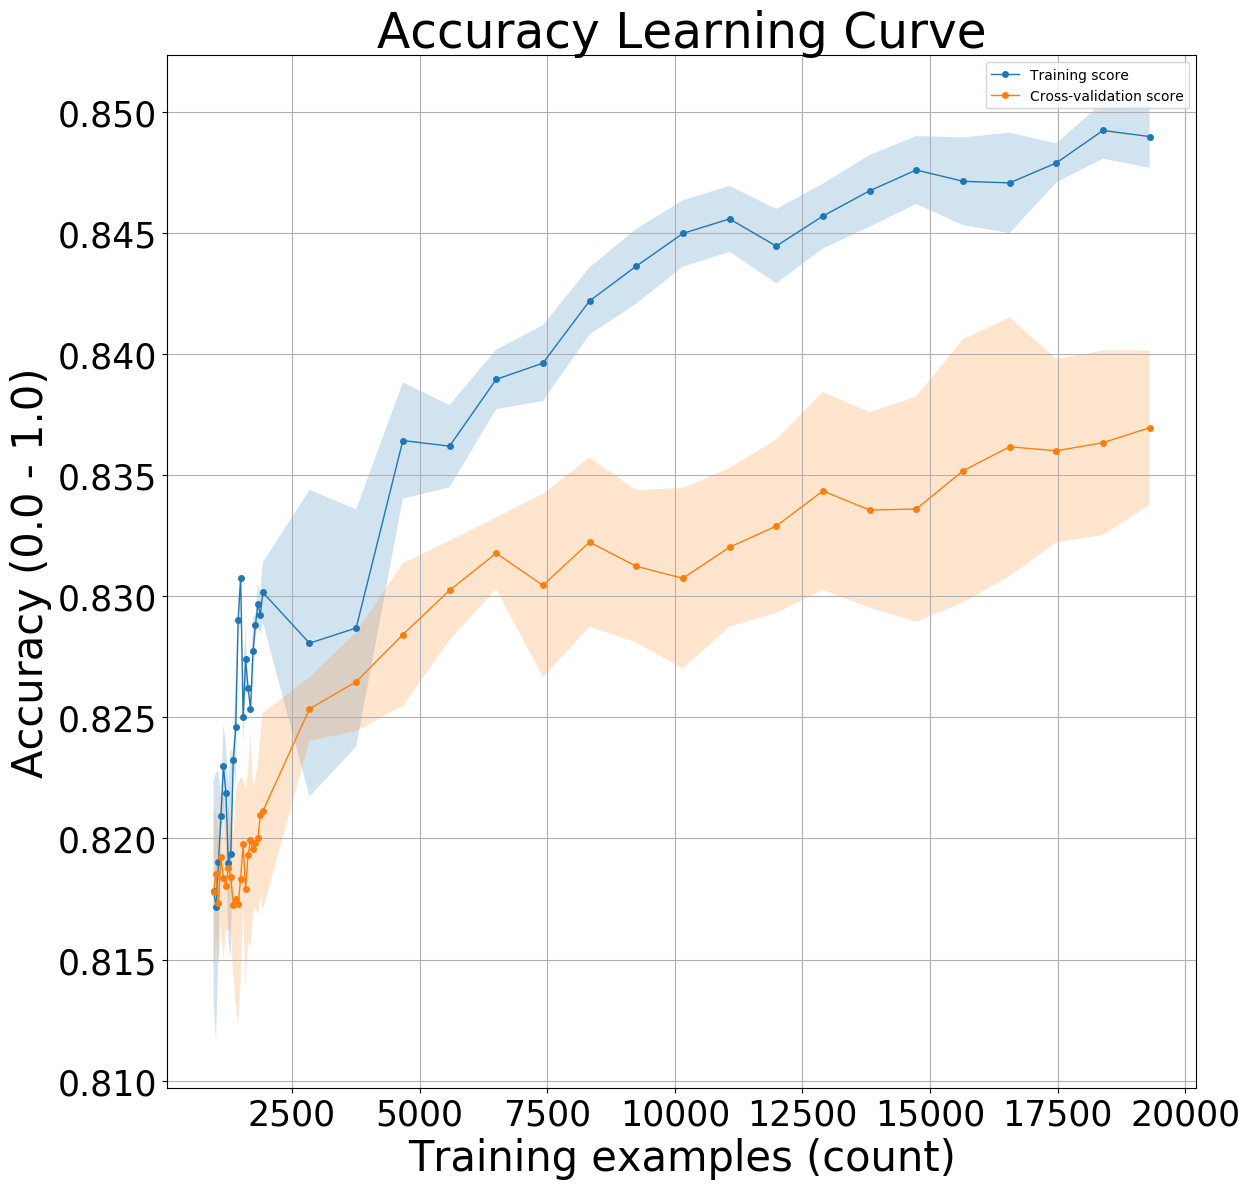

In [37]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------

In [38]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# -------------------------------------------


In [39]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# # -------------------------------------------


In [40]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: n_neighbors

In [41]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)

accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

In [42]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors') 

# plt.xlabel('n_neighbors (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

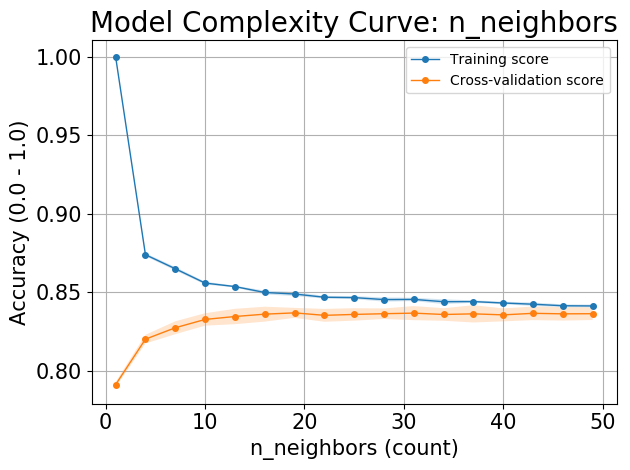

In [43]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: n_neighbors', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('n_neighbors (count)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = n_neighbors

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()

In [44]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [45]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [34]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [49]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

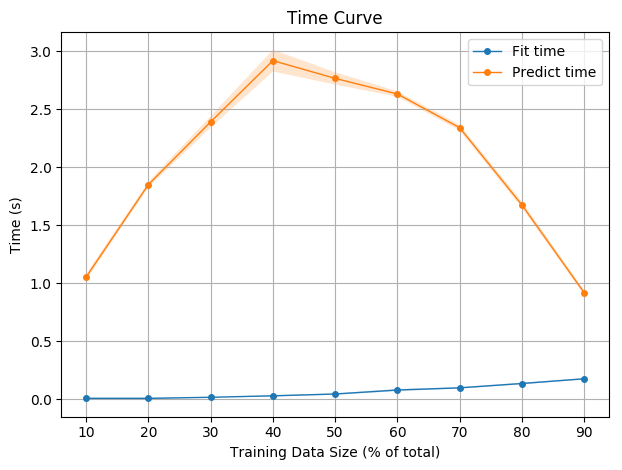

In [50]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [51]:
print(fit_scores_mean)
print(predict_scores_mean)

[0.00625  0.00625  0.015625 0.028125 0.04375  0.078125 0.096875 0.134375
 0.175   ]
[1.053125 1.85     2.390625 2.91875  2.765625 2.63125  2.340625 1.675
 0.91875 ]
